In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

data=pd.read_csv("/content/customer_train.csv")
print (data.shape)


(1680, 31)


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0.1         1680 non-null   int64  
 1   Unnamed: 0           1680 non-null   int64  
 2   ID                   1680 non-null   int64  
 3   Year_Birth           1680 non-null   int64  
 4   Education            1680 non-null   object 
 5   Marital_Status       1680 non-null   object 
 6   Income               1663 non-null   float64
 7   Kidhome              1680 non-null   int64  
 8   Teenhome             1680 non-null   int64  
 9   Dt_Customer          1680 non-null   object 
 10  Recency              1680 non-null   int64  
 11  MntCoke              1680 non-null   int64  
 12  MntFruits            1680 non-null   int64  
 13  MntMeatProducts      1680 non-null   int64  
 14  MntFishProducts      1680 non-null   int64  
 15  MntSweetProducts     1680 non-null   i

it is found that columns are  Unnamed: 0.1','Unnamed: 0','Z_CostContact','Z_Revenue' not relevnt for the data preprocessing

In [ ]:
data=data.drop(columns=['Unnamed: 0.1','Unnamed: 0','Z_CostContact','Z_Revenue'])
#check for remaining columns
print(data.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')


In [ ]:
print(data.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 17
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64


In [ ]:
# Imputing of missing values in the 'Income' column with the mean
data['Income'].fillna(data['Income'].mean(), inplace=True)

# Check for remaining missing values
print(data.isnull().sum())

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64


DESCRIPTIVE STATASTICS

In [ ]:

print (data.describe ())


                 ID   Year_Birth        Income      Kidhome     Teenhome  \
count   1680.000000  1680.000000  1.680000e+03  1680.000000  1680.000000   
mean    5551.728571  1968.847619  5.201434e+07     0.452381     0.500000   
std     3238.155703    12.027192  2.137345e+07     0.546901     0.550055   
min        0.000000  1893.000000  1.730000e+06     0.000000     0.000000   
25%     2823.250000  1960.000000  3.579075e+07     0.000000     0.000000   
50%     5381.000000  1970.000000  5.144550e+07     0.000000     0.000000   
75%     8370.750000  1977.000000  6.789750e+07     1.000000     1.000000   
max    11191.000000  1996.000000  1.623970e+08     2.000000     2.000000   

           Recency       MntCoke      MntFruits  MntMeatProducts  \
count  1680.000000  1.680000e+03    1680.000000     1.680000e+03   
mean     49.083333  3.048994e+05   25918.452381     1.657738e+05   
std      28.930637  3.387051e+05   39532.059109     2.242424e+05   
min       0.000000  0.000000e+00       0.00

The data contains information about 1680 customers, including their demographics (year of birth), income, household information (whether they have children or teenagers at home), and spending habits (money spent on Coke). It also includes a binary variable indicating whether the customer responded to campaign, but all values in this column are 0 in this example.

In [ ]:
data.to_csv('cleaned_data.csv', index=False)
print('Cleaned dataset saved as cleaned-data.csv.')

Cleaned dataset saved as cleaned-data.csv.


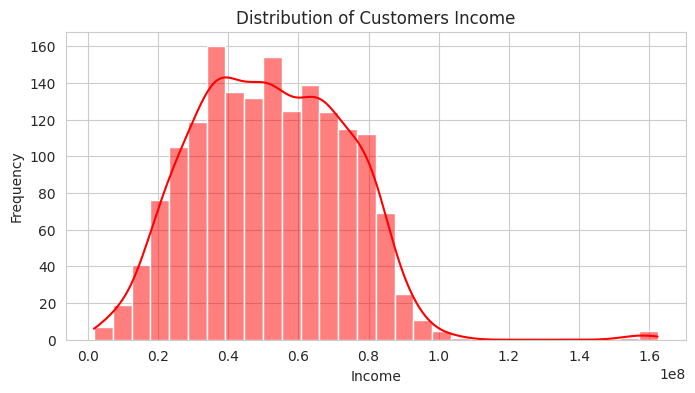

In [ ]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Plotting the distribution of customers' income
plt.figure(figsize=(8, 4), facecolor='white')
sns.histplot(data['Income'], bins=30, kde=True, color='red')
plt.title( 'Distribution of Customers Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()



This histogram shows the distribution of customers' income. It appears that the majority of customers have an income in a specific range, with a few outliers having significantly higher incomes.

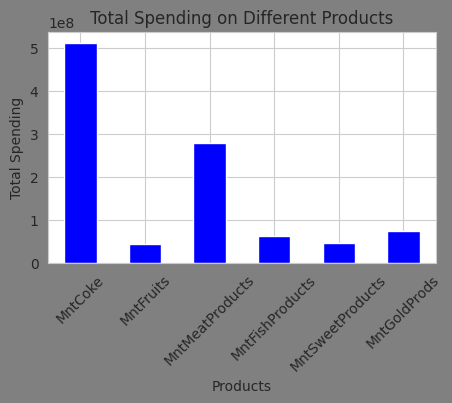

In [ ]:
# Plotting total spending on different products
product_columns = ['MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
total_spending = data[product_columns].sum()

plt.figure(figsize=(5, 3), facecolor='grey')
total_spending.plot(kind='bar', color='blue')
plt.title('Total Spending on Different Products')
plt.xlabel('Products')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)
plt.show()

This bar chart represents the total spending on different products by all customers. It's clear that certain products, like meat and gold, have higher total spending compared to others like fruits and sweets.

 MntFruits and MntMeatProducts have highest  total spending, at around 300 million each.
 MntFishProducts and MntSweetProducts have come next in the total spending, at around 200 million each.
 MntGoldProds has the lowest total spending, at around 100 million.

**Model Selection**

In [ ]:
try:
    df = pd.read_csv('/content/cleaned_data.csv', encoding='ascii')
except FileNotFoundError:
    print("File not found. Please check the file path.")

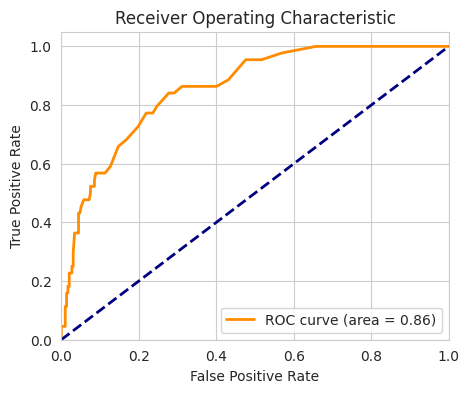

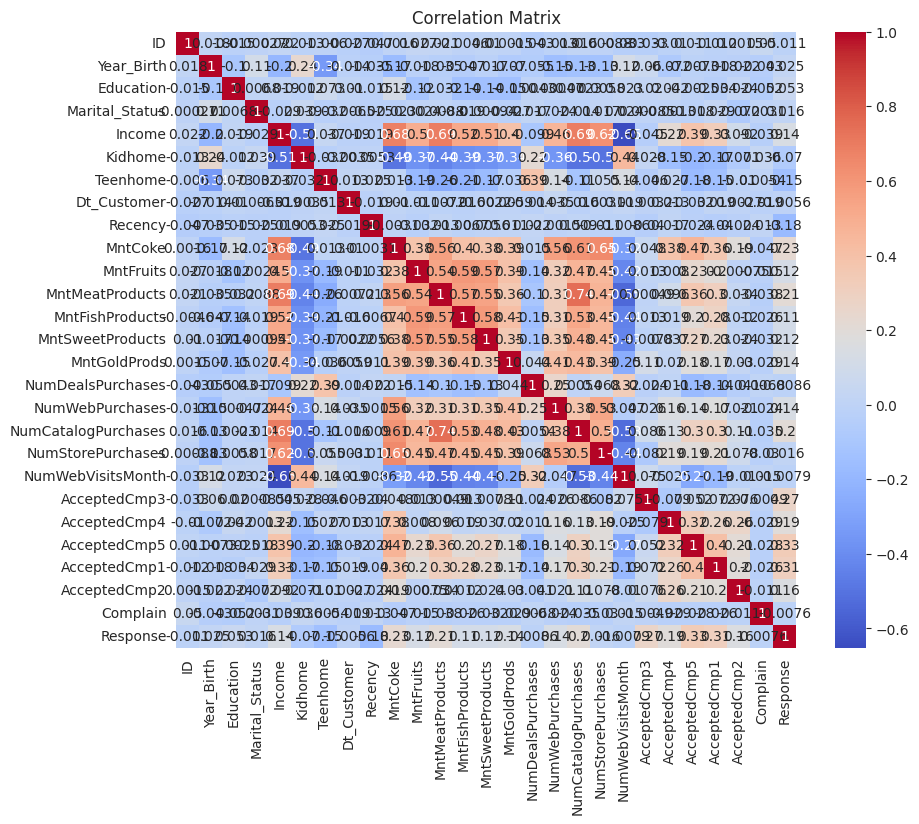

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

# Encode categorical variables
le = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])

# Split the data into features and target variable
X = df.drop(['Response'], axis=1)
y = df['Response']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict probabilities
y_pred_proba = clf.predict_proba(X_test)[:,1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Potential Positive Correlations:

Kidhome, Teenhome with MntFruits, MntSweetProducts (families might buy more fruits and sweets)
NumWebPurchases with NumWebVisitsMonth (more website visits could lead to more online purchases)

Potential Negative Correlations:

Recency with Response (more recent purchases might indicate higher likelihood of responding to a campaign)
NumStorePurchases with NumWebPurchases (customers who buy more in-store might buy less online)

**Adding new features**

In [ ]:
from datetime import datetime
# Calculate age
current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth']

# Define age groups
bins = [0, 30, 40, 50, 60, 70, 80, 100]
labels = ['<30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Summarize purchase frequencies for each age group
purchase_columns = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

# Group by AgeGroup and calculate mean for purchase columns
grouped = df.groupby('AgeGroup')[purchase_columns].mean().reset_index()

In [ ]:
# Convert 'Year_Birth' to age and categorize into age groups
current_year = 2014
df['Age'] = current_year - df['Year_Birth']

# Define age groups
bins = [0, 30, 40, 50, 60, 70, 80, np.inf]
labels = ['<30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Summarize the response to promotional deals by age group
promo_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
df_promo_response = df.groupby('Age_Group')[promo_columns].sum()

print(df_promo_response)

           AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  \
Age_Group                                                           
<30                  17             1            16            10   
30-40                21             3            38            18   
40-50                20             5            34            39   
50-60                28             9            19            34   
60-70                17             2            11            22   
70-80                 2             0             2             2   
80+                   0             0             0             0   

           AcceptedCmp5  Response  
Age_Group                          
<30                  19        27  
30-40                22        57  
40-50                35        79  
50-60                15        45  
60-70                22        31  
70-80                 2         3  
80+                   1         0  


1. Calculating Age:

    Imports datetime module.
    Defines current_year using datetime.now().year.
    Creates a new column 'Age' in the DataFrame df by subtracting 'Year_Birth' from current_year.

2. Defining Age Groups:

    Creates lists bins and labels to define age groups and corresponding labels.
    bins specifies the boundaries for each age group (e.g., 0-30, 30-40, etc.).
    labels specifies names for each age group (e.g., '<30', '30-40', etc.).

3. Grouping by Age Group:

    Creates a new column 'AgeGroup' using pd.cut. This function assigns each row in df['Age'] to the corresponding age group based on the defined bins.
    right=False ensures that a value falling exactly on a bin boundary is included in the lower bin (e.g., someone born in 1994 would be in the <30 group).

4. Summarizing Purchase Frequencies:

    Defines purchase_columns as a list of columns containing purchase frequencies (e.g., NumDealsPurchases, NumWebPurchases, etc.).
    Groups df by 'AgeGroup'.
    Calculates the mean for each purchase column within each age group using .mean().
    Resets the index of the resulting groupby object using .reset_index() to create a regular DataFrame with columns 'AgeGroup' and the purchase frequencies.



**Model Building**

In [ ]:
# Import libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

# Select features for clustering
numerical_features = ['Income', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts',
                     'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases',
                     'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'NumDealsPurchases']
categorical_features = ['Education', 'Marital_Status']

# Define preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Handle unknown categories
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define K-Means model
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust n_clusters as needed

# Create pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('kmeans', kmeans)])

# Fit the model (assuming 'df' is your data)
pipeline.fit(df)

# Get cluster labels
cluster_labels = pipeline.named_steps['kmeans'].labels_

# Add cluster labels to original dataset
df['Cluster'] = cluster_labels

# Explore clusters
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                  ID   Year_Birth  Education  Marital_Status        Income  \
Cluster                                                                      
0        5506.798212  1971.205619   1.555556        3.025543  3.523212e+07   
1        5775.806742  1967.793258   1.438202        2.934831  7.592128e+07   
2        5408.953540  1965.800885   1.754425        2.995575  5.754951e+07   

          Kidhome  Teenhome  Dt_Customer    Recency        MntCoke  ...  \
Cluster                                                             ...   
0        0.766284  0.455939   308.947637  49.257982   41886.334610  ...   
1        0.026966  0.220225   297.206742  48.391011  594651.685393  ...   
2        0.327434  0.851770   309.926991  49.462389  475252.212389  ...   

         NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
Cluster                                                                     
0                 3.214559           6.434227      0.075351      0.012771   
1 

<ipython-input-21-56d2811a946e>:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_summary = df.groupby('Cluster').mean()


The table summarizes the results of KMeans clustering on a customer dataset. Here's a breakdown of the key points:

  There are 3 clusters (0, 1, and 2).
  Each row represents the average values for various features within a specific cluster.
  Customers are likely grouped based on a combination of features like income, spending habits (money spent on Coke etc.), purchase behavior (number of store purchases etc.), and demographics (encoded features from Education and Marital_Status).

Observations from some key features:

  Income: Cluster 1 has the highest average income, followed by Cluster 2 and then Cluster 0.
  Spending habits: It seems Cluster 1 spends more on Coke (MntCoke) compared to the other clusters.
   Purchase behavior: Cluster 1 might have fewer store purchases (NumStorePurchases) on average compared to the other clusters.




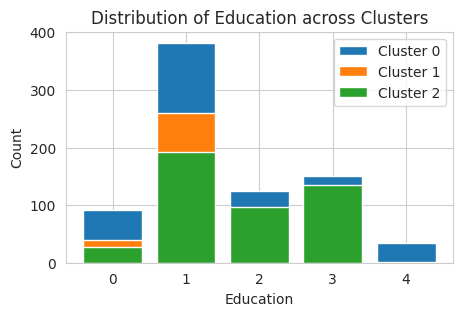

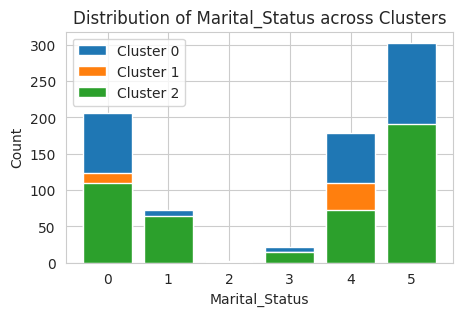

In [ ]:
import matplotlib.pyplot as plt

# Define the categorical features to plot
categorical_features = ['Education', 'Marital_Status']

# Set the number of clusters
num_clusters = len(cluster_summary)

# Plot bar charts for each categorical feature
for feature in categorical_features:
    fig, ax = plt.subplots(figsize=(5, 3))
    for cluster in range(num_clusters):
        cluster_data = df[df['Cluster'] == cluster]
        cluster_counts = cluster_data[feature].value_counts()
        ax.bar(cluster_counts.index, cluster_counts.values, label=f'Cluster {cluster}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.set_title(f'Distribution of {feature} across Clusters')
    ax.legend()
plt.show()

Interpretation:

   Cluster 0 likely represents a group with a mix of education levels, with a slight majority having education level "2".
   Cluster 1 appears to be dominated by individuals with education level "1".
  Cluster 2 exhibits a relatively even distribution of education levels, suggesting a diverse mix of individuals.


In [ ]:
X_train.dtypes

ID                        int64
Year_Birth                int64
Education                 int64
Marital_Status            int64
Income                  float64
Kidhome                   int64
Teenhome                  int64
Dt_Customer               int64
Recency                   int64
MntCoke                   int64
MntFruits                 int64
MntMeatProducts           int64
MntFishProducts           int64
MntSweetProducts          int64
MntGoldProds              int64
NumDealsPurchases         int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
NumWebVisitsMonth         int64
AcceptedCmp3              int64
AcceptedCmp4              int64
AcceptedCmp5              int64
AcceptedCmp1              int64
AcceptedCmp2              int64
Complain                  int64
Response                  int64
Age                       int64
AgeGroup               category
Age_Group              category
dtype: object

In [ ]:
# Split the dataset into features (X) and the target variable (y)
X = df.drop(columns=['Response'])
y = df['Response']

# Encode categorical variables
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
# Define models with increased max_iter and scaled data
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC(probability=True)
}

# Create pipeline for each model with scaling
pipelines = {}
for name, model in models.items():
    pipelines[name] = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'Logistic Regression': {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]},
    'Support Vector Machine': {'classifier_C': [0.001, 0.01, 0.1, 1, 10, 100], 'classifier_gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
}

# Creating pipeline for each model
pipelines = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    pipelines[name] = pipeline

# Define hyperparameters
param_grid = {
    'Logistic Regression': {'model__C': [0.1, 1, 10]},
    'Support Vector Machine': {'model__C': [0.1, 1, 10], 'model__kernel': ['linear', 'rbf']}
}

# Train and tune models
best_models = {}
for name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grid[name], cv=5, scoring='roc_auc')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# Evaluate performance of each model
evaluation_metrics = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    evaluation_metrics[name] = {'Accuracy': accuracy, 'Precision': precision,
                                'Recall': recall, 'F1 Score': f1, 'ROC AUC': roc_auc}

# Compare the performance of different models
for name, metrics in evaluation_metrics.items():
    print(f"Performance Metrics for {name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
print()

Performance Metrics for Logistic Regression:
Accuracy: 0.9077380952380952
Precision: 0.76
Recall: 0.4318181818181818
F1 Score: 0.5507246376811594
ROC AUC: 0.8718088418430884
Performance Metrics for Support Vector Machine:
Accuracy: 0.875
Precision: 0.53125
Recall: 0.38636363636363635
F1 Score: 0.4473684210526316
ROC AUC: 0.8415317559153175



Both models achieved moderate accuracy, but they suffer from class imbalance issues, as evidenced by the lower precision and recall values for the positive class.
Logistic Regression seems to perform slightly better in terms of accuracy and F1-Score, but it also has a higher bias towards the negative class (lower recall).
SVM has lower overall performance compared to Logistic Regression in this scenario.